In [35]:
from codebase.utils import MongoConnector
import pandas as pd

In [2]:
conn = MongoConnector("./config.ini")

# Step1, Retrieve hashtags from Mongo

Take following times from Mongo:
> CPU times: user 9min 9s, sys: 11.7 s, total: 9min 20s  
> Wall time: 13min 26s

I have save them as pickle. Just read back them.

In [ ]:
# %%time

# Weeks = ["FirstWeek_March", "SecondWeek_March", "ThirdWeek_March", "FourthWeek_March",\
#          "FirstWeek_April", "SecondWeek_April", "ThirdWeek_April", "FourthWeek_April"]

# query = {}
# query["hashtags"] = {
#     u"$exists": True
# }

# rows_list = []
# for each_week in Weeks:
#     conn.get_collection_cursor(each_week)
#     docs = conn.data_streaming_from_collection(query=query)
#     for i, doc in enumerate(docs):
#         if i % 100000 == 0:
#             print(f"{each_week}: {i}")
        
#         row_dict = dict()
#         created_at = doc["created_at"]
#         for tag in doc["hashtags"]:
#             row_dict.update(created_at=created_at, hashtag=tag)
#             rows_list.append(row_dict)

# tagsDF = pd.DataFrame(rows_list)

In [3]:
# save pickle
# tagsDF.to_pickle(path="./export/Hashtags-of-Mar-Apr.pkl.gz",
#                  compression="gzip")

# read pickle
tagsDF = pd.read_pickle("./export/Hashtags-of-Mar-Apr.pkl.gz",
                  compression="gzip")
tagsDF.reset_index()
tagsDF = tagsDF.set_index("created_at")

In [40]:
tagsDF["hashtag"] = tagsDF["hashtag"].apply(str.lower)

# Step2, Resample counts of hashtag by week (or any time granuality)

> CPU times: user 21min 44s, sys: 3.19 s, total: 21min 47s  
> Wall time: 21min 46s

> CPU times: user 18min 16s, sys: 5.52 s, total: 18min 22s  
> Wall time: 18min 21s

In [42]:
%%time
tagsDF = tagsDF.loc['2020-03-01':'2020-04-26']
grouped_tagsDF = tagsDF.groupby('hashtag').resample('W')['hashtag'].count()

CPU times: user 18min 16s, sys: 5.52 s, total: 18min 22s
Wall time: 18min 21s


In [43]:
# grouped_tagsDF.to_pickle("./export/Counts-Hashtags-of-Mar-Apr.pkl.gz",
#                   compression="gzip")
# grouped_tagsDF = pd.read_pickle("./export/Counts-Hashtags-of-Mar-Apr.pkl.gz",
#                    compression="gzip")
# grouped_tagsDF.to_pickle("./export/Counts-lower-Hashtags-of-Mar-Apr.pkl.gz",
#                   compression="gzip")
grouped_tagsDF = pd.read_pickle("./export/Counts-lower-Hashtags-of-Mar-Apr.pkl.gz",
                   compression="gzip")

In [44]:
gdf = grouped_tagsDF.unstack('hashtag', fill_value=0)

In [52]:
gdf.shape

(9, 651587)

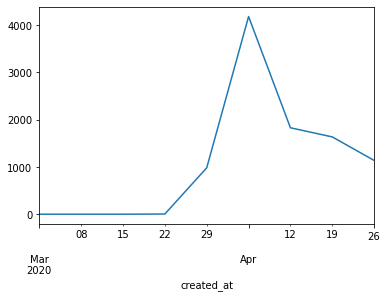

In [61]:
gdf["masks4all"].plot()

# Step3, Calculate count difference by week

In [47]:
WeekDiff = gdf.diff(axis=0)

In [48]:
WeekDiff.index

DatetimeIndex(['2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22',
               '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19',
               '2020-04-26'],
              dtype='datetime64[ns]', name='created_at', freq=None)

# Step4, Pick those hashtag with large count difference (Most Surging/Most Diminishing)

In [59]:
# change to [::-1] to get descending results
# and [::1] to get ascending results
sort_ids = WeekDiff.iloc[6].argsort()[::1][:50]

In [60]:
WeekDiff.iloc[6][sort_ids]

hashtag
coronavirus                      -32811.0
covid19pandemic                  -17841.0
covid2019                        -12298.0
follow                           -11636.0
coronavirustruth                  -9917.0
coronaviruspandemic               -7641.0
stayhomesavelives                 -5967.0
stayathome                        -5339.0
quarantine                        -4798.0
thelockdown                       -4366.0
coronaupdate                      -4026.0
aprilfoolsday                     -3375.0
bot                               -3079.0
metal                             -2975.0
coronavirusoutbreak               -2782.0
coronavirususa                    -2765.0
coronavirusindia                  -2558.0
indiafightscorona                 -2441.0
redbubble                         -2402.0
masks4all                         -2354.0
coronavirusupdates                -2327.0
coronavirusitaly                  -1761.0
coronalockdown                    -1749.0
premier                   